_This puzzle has been taken from [Jane Street](https://www.janestreet.com)'s puzzle page [here](https://www.janestreet.com/puzzles/bracketology-101-index/)_.

# Recursive & memoized computation of ideal seed swap for tournament bracket
---

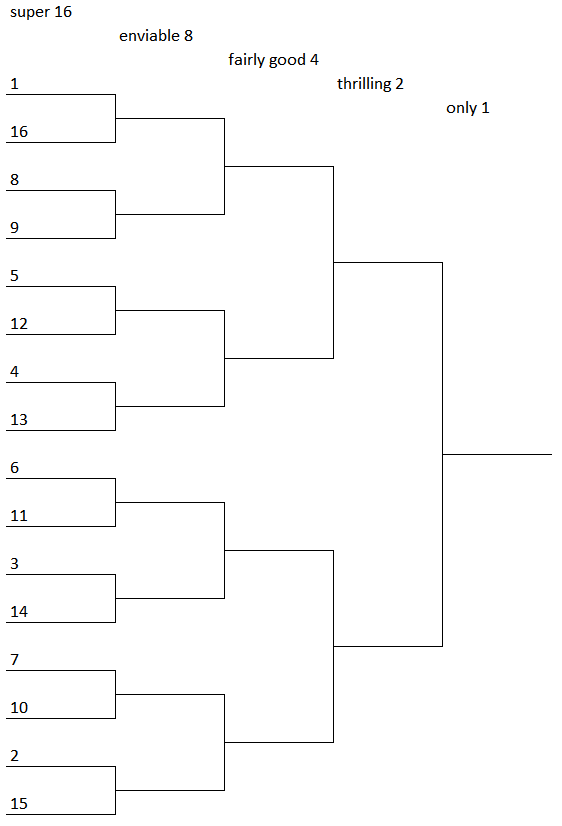

---
## `Tournament setup`

A tournament with $16$ competitors, are seeded $1$-$16$, and arranged in the single-elimination bracket as pictured above. Assume that when the $X$-seed plays the $Y$-seed, the $X$-seed has a probability of winning: 
$$
P(X \text{ win}) = \frac{Y}{(X+Y)}
$$
E.g. in the first round, the $5$-seed has a $\frac{12}{17}$ chance of beating the $12$-seed.

---
## `Problem Statement`

The $2$-seed has the chance to secretly swap two teams placements in the bracket before the tournament begins. So, for example, say they choose to swap the $8$- and $16$-seeds. Then the $8$-seed would play their first game against the $1$-seed and have a $1/9$ chance of advancing to the next round, and the $16$-seed would play their first game against the $9$-seed and have a $9/25$ chance of advancing.

What seeds should the $2$-seed swap to maximize their (the $2$-seed’s) probability of winning the tournament, and how much does the swap increase that probability?

---
## `Solution`

A good algorithm to solve this problem is to compute the probability distributions of the winners of each match **`recursively`**, given each swap. This is true because recursive tools are good at enumerating all possible scenarios. Our problem requires us to enumerate all possibilities (_of a seed emerging winner_) while following the fundamental rules of **`law of total probability`**. We will also see if **`memoization`** can be a helpful tool for our problem solving.

> ### *`Recursion`*
*Recursion is a method of solving a computational problem where the solution depends on solutions to smaller instances of the same problem. Recursion solves such recursive problems by using functions that call themselves from within their own code.*
>### _`Memoization`_
_In computing, memoization or memoisation is an optimization technique used primarily to speed up computer programs by storing the results of expensive function calls and returning the cached result when the same inputs occur again._
>### _`Law of Total Probability`_
_In probability theory, the law of total probability is a fundamental rule relating marginal probabilities to `conditional probabilities`. It expresses the total probability of an outcome which can be realized via several distinct events, hence the name._

---
## `Code`
Store seed and order of competitors in a `list`. 
_**Note:** order is important here._

In [1]:
main_seed = 2
competitors = [1, 16, 8, 9, 5, 12, 4, 13, 6, 11, 3, 14, 7, 10, 2, 15]

##### `Function to compute winning probability distribution of seeds`

In [2]:
def prob_win(compete_list):
    
    # base case
    if len(compete_list) == 2:
        
        x = compete_list[0]
        y = compete_list[1]
        p_basic_win = {x: y/(x+y),
                       y: x/(x+y)}
        return p_basic_win
    
    else:
        
        # initialize a dictionary for probability distribution and divide the problem into two halves
        p_win = {}
        idx = len(compete_list) // 2
        
        """
        for each seed in one half, compute their probability of winning against
        all possible seeds that will emerge winner from another half
        
        this follows the basic principle of law of total probability
        and recursive solution will iterate through all possible scenarios
        """
        
        # first half
        for y in compete_list[:idx]:
            
            total_prob = 0
            for x in compete_list[idx:]:
                total_prob += prob_win(compete_list[:idx])[y] * \
                              prob_win(compete_list[idx:])[x] * \
                              prob_win([x, y])[y]
            p_win[y] = total_prob
        
        # second half
        for y in compete_list[idx:]:
            
            total_prob = 0
            for x in compete_list[:idx]:
                total_prob += prob_win(compete_list[idx:])[y] * \
                              prob_win(compete_list[:idx])[x] * \
                              prob_win([x, y])[y]
            p_win[y] = total_prob
        
        # return probability distribution dictionary
        return p_win

##### `Winning probabilities in current order`

In [3]:
%%time
prob_dbn = prob_win(competitors)
prob_dbn

CPU times: user 263 ms, sys: 4.85 ms, total: 268 ms
Wall time: 270 ms


{1: 0.5192183551301611,
 16: 0.0009035621683887103,
 8: 0.008741208318903763,
 9: 0.006136487216153138,
 5: 0.033561501223655615,
 12: 0.0026670619351496184,
 4: 0.05668634688419432,
 13: 0.0020387261731212784,
 6: 0.021798623488660122,
 11: 0.003673491403505775,
 3: 0.10678948365900305,
 14: 0.0016381437654795343,
 7: 0.014006607999788739,
 10: 0.0048488911001328145,
 2: 0.21603968781701652,
 15: 0.0012518217166858038}

---
##### `Sanity checks`

In [4]:
print(f'Sum of probabilities = {sum(prob_dbn.values()):.2f}')

Sum of probabilities = 1.00


We expect to see lower seeds having higher probability of winning.

In [5]:
sort_prob_dbn = dict(sorted(prob_dbn.items()))    # sort dictionary by key

for i in sort_prob_dbn:
    if i == main_seed:
        print(f'Prob win of seed {i} = {sort_prob_dbn[i]:.4f} (main seed)')
    else:
        print(f'Prob win of seed {i} = {sort_prob_dbn[i]:.4f}')

Prob win of seed 1 = 0.5192
Prob win of seed 2 = 0.2160 (main seed)
Prob win of seed 3 = 0.1068
Prob win of seed 4 = 0.0567
Prob win of seed 5 = 0.0336
Prob win of seed 6 = 0.0218
Prob win of seed 7 = 0.0140
Prob win of seed 8 = 0.0087
Prob win of seed 9 = 0.0061
Prob win of seed 10 = 0.0048
Prob win of seed 11 = 0.0037
Prob win of seed 12 = 0.0027
Prob win of seed 13 = 0.0020
Prob win of seed 14 = 0.0016
Prob win of seed 15 = 0.0013
Prob win of seed 16 = 0.0009


---
##### `Function to get all possible swaps`

In [6]:
def get_all_swaps(x, seed):
    
    temp = x.copy()                             # cuz Python follows pass by object reference and list is mutable
    temp.remove(seed)
    swaps = []
    
    for i in range(len(temp) - 1):              # iteration for all possible seed swaps
        for j in range(i + 1, len(temp)):
            swaps.append((temp[i], temp[j]))
            
    return swaps

In [7]:
all_swaps = get_all_swaps(competitors, main_seed)
all_swaps

[(1, 16),
 (1, 8),
 (1, 9),
 (1, 5),
 (1, 12),
 (1, 4),
 (1, 13),
 (1, 6),
 (1, 11),
 (1, 3),
 (1, 14),
 (1, 7),
 (1, 10),
 (1, 15),
 (16, 8),
 (16, 9),
 (16, 5),
 (16, 12),
 (16, 4),
 (16, 13),
 (16, 6),
 (16, 11),
 (16, 3),
 (16, 14),
 (16, 7),
 (16, 10),
 (16, 15),
 (8, 9),
 (8, 5),
 (8, 12),
 (8, 4),
 (8, 13),
 (8, 6),
 (8, 11),
 (8, 3),
 (8, 14),
 (8, 7),
 (8, 10),
 (8, 15),
 (9, 5),
 (9, 12),
 (9, 4),
 (9, 13),
 (9, 6),
 (9, 11),
 (9, 3),
 (9, 14),
 (9, 7),
 (9, 10),
 (9, 15),
 (5, 12),
 (5, 4),
 (5, 13),
 (5, 6),
 (5, 11),
 (5, 3),
 (5, 14),
 (5, 7),
 (5, 10),
 (5, 15),
 (12, 4),
 (12, 13),
 (12, 6),
 (12, 11),
 (12, 3),
 (12, 14),
 (12, 7),
 (12, 10),
 (12, 15),
 (4, 13),
 (4, 6),
 (4, 11),
 (4, 3),
 (4, 14),
 (4, 7),
 (4, 10),
 (4, 15),
 (13, 6),
 (13, 11),
 (13, 3),
 (13, 14),
 (13, 7),
 (13, 10),
 (13, 15),
 (6, 11),
 (6, 3),
 (6, 14),
 (6, 7),
 (6, 10),
 (6, 15),
 (11, 3),
 (11, 14),
 (11, 7),
 (11, 10),
 (11, 15),
 (3, 14),
 (3, 7),
 (3, 10),
 (3, 15),
 (14, 7),
 (14, 10),

---
##### `Function to return a swapped list`

In [8]:
def swap(x, ele):
    
    temp = x.copy()                       # cuz Python follows pass by object reference and list is mutable
    i = temp.index(ele[0])
    j = temp.index(ele[1])
    temp[i], temp[j] = ele[1], ele[0]     # swap
    
    return temp

In [9]:
# an example
print(competitors)
print(swap(competitors, (4, 7)))

[1, 16, 8, 9, 5, 12, 4, 13, 6, 11, 3, 14, 7, 10, 2, 15]
[1, 16, 8, 9, 5, 12, 7, 13, 6, 11, 3, 14, 4, 10, 2, 15]


---
##### `Store winning probability distribution of seeds for all possible swaps`

In [10]:
%%time
store = {}

for i in all_swaps:
    store[i] = prob_win(swap(competitors, i))

CPU times: user 27.6 s, sys: 236 ms, total: 27.8 s
Wall time: 28.5 s


---
##### `Best swap and corresponding probability distribution of seeds`

In [11]:
"""
Sort in descending order the 'store' dictionary by using
winning probability of seed 2 for each swap case as the key
and get the corresponding best swap and probability distribution
at zeroth index (after sorting by above described key)
"""

best_swap, best_prob_dbn = sorted(store.items(), key = lambda x: x[1][2], reverse = True)[0]
best_swap

(16, 3)

In [12]:
sort_best_prob_dbn = dict(sorted(best_prob_dbn.items()))

for i in sort_best_prob_dbn:
    if i == main_seed:
        print(f'Prob win of seed {i} = {sort_best_prob_dbn[i]:.4f} (main seed)')
    else:
        print(f'Prob win of seed {i} = {sort_best_prob_dbn[i]:.4f}')

Prob win of seed 1 = 0.4253
Prob win of seed 2 = 0.2816 (main seed)
Prob win of seed 3 = 0.0629
Prob win of seed 4 = 0.0696
Prob win of seed 5 = 0.0419
Prob win of seed 6 = 0.0437
Prob win of seed 7 = 0.0225
Prob win of seed 8 = 0.0106
Prob win of seed 9 = 0.0074
Prob win of seed 10 = 0.0082
Prob win of seed 11 = 0.0086
Prob win of seed 12 = 0.0035
Prob win of seed 13 = 0.0027
Prob win of seed 14 = 0.0056
Prob win of seed 15 = 0.0022
Prob win of seed 16 = 0.0037


In [13]:
print(f'Gain in probability: {best_prob_dbn[2] - prob_dbn[2]:.6f}')

Gain in probability: 0.065580


---
## `Memoization`
Let's see if memoized approach can speed up our calculations. 

In [14]:
memo = {}

def prob_win_memo(compete_list):
    
    key = tuple(compete_list)      # convert to tuple as tuple is immutable and dict key should be hashable (i.e. immutable)
    
    if key in memo:                # check memo
        return memo[key]
    
    elif len(compete_list) == 2:   # base case
        
        x = compete_list[0]
        y = compete_list[1]
        p_basic_win = {x: y/(x+y),
                       y: x/(x+y)}
        memo[key] = p_basic_win    # store results in dict
        return memo[key]
    
    else:
        
        idx = len(compete_list) // 2
        p_win = {}
        
        for y in compete_list[:idx]:
            
            total_prob = 0
            for x in compete_list[idx:]:
                total_prob += prob_win(compete_list[:idx])[y] * \
                              prob_win(compete_list[idx:])[x] * \
                              prob_win([x, y])[y]
            p_win[y] = total_prob
            
        for y in compete_list[idx:]:
            
            total_prob = 0
            for x in compete_list[:idx]:
                total_prob += prob_win(compete_list[idx:])[y] * \
                              prob_win(compete_list[:idx])[x] * \
                              prob_win([x, y])[y]
            p_win[y] = total_prob
        
        memo[key] = p_win           # store results in dict
        
        return memo[key]

In [15]:
%%time
store_memo = {}

for i in all_swaps:
    store_memo[i] = prob_win_memo(swap(competitors, i))

CPU times: user 26.6 s, sys: 173 ms, total: 26.8 s
Wall time: 27.5 s


Let's compare the time taken by `naive recursive` vs `memoized` code

| Code Type | Time Taken(s) |
| :-: | :-: |
| Naive Recursion | $28.5$s |
| Memoization | $27.5$s |

Barely any improvement (_only $1$ second_). But this is understandable because, specific to our problem - the order of seed in tournament matters (i.e. impacts `probability` of winning). Therefore, for each new swap, we end up generating almost new set of `keys` for our `memo dict`. The number of overlaps in keys is relatively low leading to very low performance gains.

We do get same results from `memoization`, as can be seen below.

---

In [16]:
best_swap_memo, best_prob_dbn_memo = sorted(store_memo.items(), key = lambda x:x[1][2], reverse = True)[0]
best_swap_memo

(16, 3)

In [17]:
sort_best_prob_dbn_memo = dict(sorted(best_prob_dbn_memo.items()))

for i in sort_best_prob_dbn_memo:
    if i == main_seed:
        print(f'Prob win of seed {i} = {sort_best_prob_dbn_memo[i]:.4f} (main seed)')
    else:
        print(f'Prob win of seed {i} = {sort_best_prob_dbn_memo[i]:.4f}')

Prob win of seed 1 = 0.4253
Prob win of seed 2 = 0.2816 (main seed)
Prob win of seed 3 = 0.0629
Prob win of seed 4 = 0.0696
Prob win of seed 5 = 0.0419
Prob win of seed 6 = 0.0437
Prob win of seed 7 = 0.0225
Prob win of seed 8 = 0.0106
Prob win of seed 9 = 0.0074
Prob win of seed 10 = 0.0082
Prob win of seed 11 = 0.0086
Prob win of seed 12 = 0.0035
Prob win of seed 13 = 0.0027
Prob win of seed 14 = 0.0056
Prob win of seed 15 = 0.0022
Prob win of seed 16 = 0.0037


In [18]:
assert best_swap == best_swap_memo
assert best_prob_dbn == best_prob_dbn_memo

---